## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [2]:
import random
from scipy import ndarray

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
palette = ['paleturquoise','c']

## Import dataset

In [5]:
from collections import Counter
from imblearn.datasets import fetch_datasets
data = fetch_datasets()['yeast_me2']

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [6]:
data.data.shape

(1484, 8)

In [7]:
len(data.data)

1484

In [8]:
def unison_shuffled_copies(a, b):
    np.random.seed(5)##change seed 1,2,3,4,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [9]:
data.data,data.target=unison_shuffled_copies(data.data, data.target)

## Initializing Results list

## Creating label and feature matrices

In [10]:
labels=data.target
print(np.unique(labels, return_counts = 1))

(array([-1,  1], dtype=int64), array([1433,   51], dtype=int64))


In [11]:
features=data.data
features.shape

(1484, 8)

In [12]:
n_feat=len(features[1])

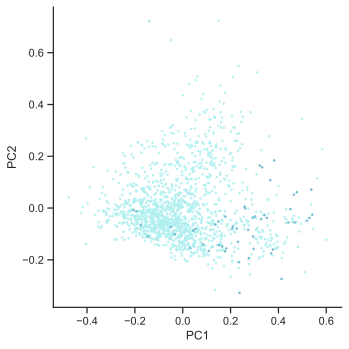

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

51

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == -1)[0]
label_0=list(label_0)
len(label_0)

1433

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//10
b=len(features_0)//10

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_4_min=features_1[3*a:4*a]
fold_4_maj=features_0[3*b:4*b]
fold_4_tst=np.concatenate((fold_4_min,fold_4_maj))
lab_4_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [23]:
fold_5_min=features_1[4*a:5*a]
fold_5_maj=features_0[4*b:5*b]
fold_5_tst=np.concatenate((fold_5_min,fold_5_maj))
lab_5_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [24]:
fold_6_min=features_1[5*a:6*a]
fold_6_maj=features_0[5*b:6*b]
fold_6_tst=np.concatenate((fold_6_min,fold_6_maj))
lab_6_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [25]:
fold_7_min=features_1[6*a:7*a]
fold_7_maj=features_0[6*b:7*b]
fold_7_tst=np.concatenate((fold_7_min,fold_7_maj))
lab_7_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [26]:
fold_8_min=features_1[7*a:8*a]
fold_8_maj=features_0[7*b:8*b]
fold_8_tst=np.concatenate((fold_8_min,fold_8_maj))
lab_8_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [27]:
fold_9_min=features_1[8*a:9*a]
fold_9_maj=features_0[8*b:9*b]
fold_9_tst=np.concatenate((fold_9_min,fold_9_maj))
lab_9_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [28]:
fold_10_min=features_1[9*a:]
fold_10_maj=features_0[9*b:]
fold_10_tst=np.concatenate((fold_10_min,fold_10_maj))
lab_10_tst=np.concatenate((np.zeros(len(fold_10_min))+1, np.zeros(len(fold_10_maj))))

In [29]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [30]:
lab_1_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [31]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_1_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [32]:
lab_2_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [33]:
fold_3_trn=np.concatenate((fold_2_min,fold_1_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_1_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [34]:
lab_3_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [35]:
fold_4_trn=np.concatenate((fold_2_min,fold_3_min,fold_1_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_1_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [36]:
lab_4_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [37]:
fold_5_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_1_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_1_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [38]:
lab_5_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [39]:
fold_6_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_1_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_1_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [40]:
lab_6_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [41]:
fold_7_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_1_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_1_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [42]:
lab_7_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [43]:
fold_8_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_1_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_1_maj,fold_9_maj,fold_10_maj))

In [44]:
lab_8_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [45]:
fold_9_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_1_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_1_maj,fold_10_maj))

In [46]:
lab_9_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [47]:
fold_10_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_1_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_1_maj))

In [48]:
lab_10_trn=np.concatenate((np.zeros(9*a)+1,np.zeros(9*b)))


In [49]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn,fold_4_trn,fold_5_trn,fold_6_trn,fold_7_trn,fold_8_trn,fold_9_trn,fold_10_trn]

In [50]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst,fold_4_tst,fold_5_tst,fold_6_tst,fold_7_tst,fold_8_tst,fold_9_tst,fold_10_tst]

In [51]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn,lab_4_trn,lab_5_trn,lab_6_trn,lab_7_trn,lab_8_trn,lab_9_trn,lab_10_trn]

In [52]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst,lab_4_tst,lab_5_tst,lab_6_tst,lab_7_tst,lab_8_tst,lab_9_tst,lab_10_tst]

In [53]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [54]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [55]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [56]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [57]:
import smote_variants as sv
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE 

In [58]:
def OVS(training_data,training_labels,neb):
    
    smote_mot2ld = sv.MOT2LD(random_state=62, k = neb)
    SMOTE_feat_mot2ld, SMOTE_labels_mot2ld = smote_mot2ld.sample(training_data, training_labels)
    
    smote_dbsmote = sv.DBSMOTE(random_state=62, )
    SMOTE_feat_dbsmote, SMOTE_labels_dbsmote = smote_dbsmote.sample(training_data, training_labels)
    
    smote_cure = sv.CURE_SMOTE(random_state=62, )
    SMOTE_feat_cure, SMOTE_labels_cure = smote_cure.sample(training_data, training_labels)
    
    smote_SOMO = sv.SOMO(random_state=62)
    SMOTE_feat_SOMO, SMOTE_labels_SOMO = smote_SOMO.sample(training_data, training_labels)
    
    sm = SMOTE(random_state=62, k_neighbors=neb, sampling_strategy=1)
    SMOTE_feat, SMOTE_labels = sm.fit_resample(training_data,training_labels)
    
    
    return(SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote,\
          SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO)

In [59]:
LR=[]
SVM=[]
KNN=[] 
LR_SM=[]
SVM_SM=[]
KNN_SM=[]
LR_MOT2TLD=[]
SVM_MOT2TLD=[]
KNN_MOT2TLD=[] 
LR_DBSMOTE=[]
SVM_DBSMOTE=[]
KNN_DBSMOTE=[] 
LR_CURE=[]
SVM_CURE=[]
KNN_CURE=[] 
LR_SOMO=[]
SVM_SOMO=[]
KNN_SOMO=[] 



i=0
while i<10:
    SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote, SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO=OVS(training_folds_feats[i],training_folds_labels[i],5)
    
    f1_lr, bal_acc_lr, aps_lr, mat_lr=lr(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    LR.append([f1_lr, aps_lr, bal_acc_lr])
    f1_svm,bal_acc_svm,aps_svm,mat_svm=svm(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    SVM.append([f1_svm,bal_acc_svm,aps_svm])
    f1_knn,bal_acc_knn,aps_knn,mat_knn=knn(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    KNN.append([f1_knn,bal_acc_knn,aps_knn])
    
    f1_lr_SMOTE,bal_acc_lr_SMOTE, aps_lr_SMOTE, mat_lr_SMOTE=lr(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_SM.append([f1_lr_SMOTE, bal_acc_lr_SMOTE, aps_lr_SMOTE])
    f1_svm_SMOTE,bal_acc_svm_SMOTE,aps_svm_SMOTE,mat_svm_SMOTE=svm(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SM.append([f1_svm_SMOTE, bal_acc_svm_SMOTE, aps_svm_SMOTE])
    f1_knn_SMOTE,bal_acc_knn_SMOTE, aps_knn_SMOTE, mat_knn_SMOTE=knn(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SM.append([f1_knn_SMOTE,bal_acc_knn_SMOTE,aps_knn_SMOTE])
        
    f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld, mat_lr_SMOTE_mot2ld=lr(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    LR_MOT2TLD.append([f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld])
    f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld, mat_svm_SMOTE_mot2ld=svm(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    SVM_MOT2TLD.append([f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld])
    f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld, mat_knn_SMOTE_mot2ld=knn(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    KNN_MOT2TLD.append([f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld])
    
    f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote, mat_lr_SMOTE_dbsmote=lr(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    LR_DBSMOTE.append([f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote])
    f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote, mat_svm_SMOTE_dbsmote=svm(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    SVM_DBSMOTE.append([f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote])
    f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote,mat_knn_SMOTE_dbsmote=knn(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    KNN_DBSMOTE.append([f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote])
    
    f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure,mat_lr_SMOTE_cure=lr(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    LR_CURE.append([f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure])
    f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure,mat_svm_SMOTE_cure=svm(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    SVM_CURE.append([f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure])
    f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure,mat_knn_SMOTE_cure=knn(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    KNN_CURE.append([f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure])
    
    f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO,mat_lr_SMOTE_SOMO=lr(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    LR_SOMO.append([f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO])
    f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO,mat_svm_SMOTE_SOMO=svm(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SOMO.append([f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO])
    f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO,mat_knn_SMOTE_SOMO=knn(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SOMO.append([f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO])

    i=i+1

2020-10-28 10:42:02,165:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:02,167:INFO:MOT2LD: starting TSNE n: 1336 d: 8


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1336 samples in 0.003s...
[t-SNE] Computed neighbors for 1336 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1336
[t-SNE] Computed conditional probabilities for sample 1336 / 1336
[t-SNE] Mean sigma: 0.048486
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 84.0096970, gradient norm = 0.1844830 (50 iterations in 0.301s)
[t-SNE] Iteration 100: error = 78.5748825, gradient norm = 0.1371724 (50 iterations in 0.234s)
[t-SNE] Iteration 150: error = 78.3376160, gradient norm = 0.1215618 (50 iterations in 0.265s)
[t-SNE] Iteration 200: error = 78.3057861, gradient norm = 0.1149190 (50 iterations in 0.265s)
[t-SNE] Iteration 250: error = 78.3340149, gradient norm = 0.1207830 (50 iterations in 0.279s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.334015
[t-SNE] Iteration 300: error = 1.5281817, gradient norm = 0.0012094 (50 iterations in 0.225s)

2020-10-28 10:42:04,941:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:05,071:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:05,126:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.1870413, gradient norm = 0.0001972 (50 iterations in 0.293s)
[t-SNE] KL divergence after 500 iterations: 1.187041


2020-10-28 10:42:05,157:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:05,192:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 143 0 4 1
balanced accuracy_LR: 0.6
f1 score_LR: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.44371854432830043
confusion matrix_LR [[143   0]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.2682893960259689
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_KNN: 0.6
f1 score_KNN: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.47871705452350616
confusion matrix_KNN [[143   0]
 [  4   1]]
tn, fp, fn, tp: 114 29 1 4
balanced accuracy_LR: 0.7986013986013987
f1 score_LR: 0.2105263157894737
kappa: 0.16131469588213077
average_precision_score: 0.3113636363636364
confusion matrix_LR [[114  29]
 [  1   4]]
tn, fp, fn, tp: 83 60 0 5
balanced accuracy_SVM: 0.7902097902097902
f1 score_SVM: 0.14285714285714288
kappa: 0.08547888774459322
average_precision_score: 0.26090909090909087
confusion matrix_SVM [[83 60]
 [ 0  5]]
t

2020-10-28 10:42:06,706:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:06,707:INFO:MOT2LD: starting TSNE n: 1336 d: 8


tn, fp, fn, tp: 92 51 0 5
balanced accuracy_SVM: 0.8216783216783217
f1 score_SVM: 0.1639344262295082
kappa: 0.10864430798299474
average_precision_score: 0.370354609929078
confusion matrix_SVM [[92 51]
 [ 0  5]]
tn, fp, fn, tp: 132 11 1 4
balanced accuracy_KNN: 0.8615384615384616
f1 score_KNN: 0.4
kappa: 0.36797153024911033
average_precision_score: 0.40175675675675676
confusion matrix_KNN [[132  11]
 [  1   4]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_LR: 0.6
f1 score_LR: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.44371854432830043
confusion matrix_LR [[143   0]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.2682893960259689
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_KNN: 0.6
f1 score_KNN: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.47871705452350616
confusion matrix_KNN [[143   0]
 [  4   1]]
[t-SNE] Computi

2020-10-28 10:42:09,463:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:09,591:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:09,647:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.1969429, gradient norm = 0.0001903 (50 iterations in 0.252s)
[t-SNE] KL divergence after 500 iterations: 1.196943


2020-10-28 10:42:09,683:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:09,714:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 142 1 3 2
balanced accuracy_LR: 0.6965034965034965
f1 score_LR: 0.5
kappa: 0.48700173310225303
average_precision_score: 0.32666666666666666
confusion matrix_LR [[142   1]
 [  3   2]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.47581073896863374
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 141 2 5 0
balanced accuracy_KNN: 0.493006993006993
f1 score_KNN: 0.0
kappa: -0.019685039370078705
average_precision_score: 0.1773230373230373
confusion matrix_KNN [[141   2]
 [  5   0]]
tn, fp, fn, tp: 120 23 1 4
balanced accuracy_LR: 0.8195804195804196
f1 score_LR: 0.25
kappa: 0.20465741155396333
average_precision_score: 0.31267399267399265
confusion matrix_LR [[120  23]
 [  1   4]]
tn, fp, fn, tp: 86 57 0 5
balanced accuracy_SVM: 0.8006993006993006
f1 score_SVM: 0.1492537313432836
kappa: 0.09251290877796892
average_precision_score: 0.3384119106699752
confusion matrix_SVM [[86 57]
 [ 0  5]]
tn, fp, fn, tp:

2020-10-28 10:42:11,438:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:11,438:INFO:MOT2LD: starting TSNE n: 1336 d: 8


tn, fp, fn, tp: 93 50 1 4
balanced accuracy_SVM: 0.7251748251748251
f1 score_SVM: 0.13559322033898305
kappa: 0.07861328125
average_precision_score: 0.6444444444444444
confusion matrix_SVM [[93 50]
 [ 1  4]]
tn, fp, fn, tp: 132 11 2 3
balanced accuracy_KNN: 0.7615384615384615
f1 score_KNN: 0.3157894736842105
kappa: 0.27994011976047894
average_precision_score: 0.13256113256113256
confusion matrix_KNN [[132  11]
 [  2   3]]
tn, fp, fn, tp: 142 1 3 2
balanced accuracy_LR: 0.6965034965034965
f1 score_LR: 0.5
kappa: 0.48700173310225303
average_precision_score: 0.32666666666666666
confusion matrix_LR [[142   1]
 [  3   2]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.477109440267335
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 141 2 5 0
balanced accuracy_KNN: 0.493006993006993
f1 score_KNN: 0.0
kappa: -0.019685039370078705
average_precision_score: 0.1773230373230373
confusion matrix_KNN [[141   2]
 [  5   0]]
[t-SN

2020-10-28 10:42:14,167:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:14,309:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:14,367:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.2285829, gradient norm = 0.0003304 (50 iterations in 0.251s)
[t-SNE] KL divergence after 500 iterations: 1.228583


2020-10-28 10:42:14,407:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:14,437:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 143 0 4 1
balanced accuracy_LR: 0.6
f1 score_LR: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.40757841598177735
confusion matrix_LR [[143   0]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.5104240099523119
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.27684684684684685
confusion matrix_KNN [[143   0]
 [  5   0]]
tn, fp, fn, tp: 128 15 2 3
balanced accuracy_LR: 0.7475524475524475
f1 score_LR: 0.2608695652173913
kappa: 0.2196029776674937
average_precision_score: 0.3949521742625191
confusion matrix_LR [[128  15]
 [  2   3]]
tn, fp, fn, tp: 83 60 1 4
balanced accuracy_SVM: 0.6902097902097902
f1 score_SVM: 0.11594202898550725
kappa: 0.056832427914751404
average_precision_score: 0.3364285714285714
confusion matrix_SVM [[83 60]
 [ 1  4]]
tn, fp, fn, tp: 130 13 2 3
balanc

2020-10-28 10:42:15,906:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:15,906:INFO:MOT2LD: starting TSNE n: 1336 d: 8


tn, fp, fn, tp: 88 55 1 4
balanced accuracy_SVM: 0.7076923076923077
f1 score_SVM: 0.125
kappa: 0.06687682954289575
average_precision_score: 0.3176750700280112
confusion matrix_SVM [[88 55]
 [ 1  4]]
tn, fp, fn, tp: 132 11 2 3
balanced accuracy_KNN: 0.7615384615384615
f1 score_KNN: 0.3157894736842105
kappa: 0.27994011976047894
average_precision_score: 0.23952986600045423
confusion matrix_KNN [[132  11]
 [  2   3]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_LR: 0.6
f1 score_LR: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.40757841598177735
confusion matrix_LR [[143   0]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.5104240099523119
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.27684684684684685
confusion matrix_KNN [[143   0]
 [  5   0]]
[t-SNE] Computing 31 nearest neighbors...
[

2020-10-28 10:42:19,028:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:19,157:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.1895356, gradient norm = 0.0001864 (50 iterations in 0.328s)
[t-SNE] KL divergence after 500 iterations: 1.189536


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:19,228:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:19,269:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:19,303:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 142 1 4 1
balanced accuracy_LR: 0.5965034965034965
f1 score_LR: 0.28571428571428575
kappa: 0.2716535433070866
average_precision_score: 0.515126050420168
confusion matrix_LR [[142   1]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.31514824797843666
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.4583333333333333
confusion matrix_KNN [[143   0]
 [  5   0]]
tn, fp, fn, tp: 121 22 1 4
balanced accuracy_LR: 0.823076923076923
f1 score_LR: 0.25806451612903225
kappa: 0.2134935304990757
average_precision_score: 0.48050505050505055
confusion matrix_LR [[121  22]
 [  1   4]]
tn, fp, fn, tp: 89 54 0 5
balanced accuracy_SVM: 0.8111888111888113
f1 score_SVM: 0.15625
kappa: 0.10020265705922093
average_precision_score: 0.4328722002635046
confusion matrix_SVM [[89 54]
 [ 0  5]]
tn, fp, fn, tp: 127 16 0 5
balan

2020-10-28 10:42:21,006:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:21,006:INFO:MOT2LD: starting TSNE n: 1336 d: 8


tn, fp, fn, tp: 80 63 0 5
balanced accuracy_SVM: 0.7797202797202798
f1 score_SVM: 0.13698630136986303
kappa: 0.07902015013828545
average_precision_score: 0.5057142857142858
confusion matrix_SVM [[80 63]
 [ 0  5]]
tn, fp, fn, tp: 131 12 1 4
balanced accuracy_KNN: 0.858041958041958
f1 score_KNN: 0.38095238095238093
kappa: 0.3473541383989145
average_precision_score: 0.31231060606060607
confusion matrix_KNN [[131  12]
 [  1   4]]
tn, fp, fn, tp: 142 1 4 1
balanced accuracy_LR: 0.5965034965034965
f1 score_LR: 0.28571428571428575
kappa: 0.2716535433070866
average_precision_score: 0.515126050420168
confusion matrix_LR [[142   1]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.31514824797843666
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.4583333333333333
confusion matrix_KNN [[143   0]
 [  5   0]]
[t-SNE] Computing

2020-10-28 10:42:24,374:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:24,515:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.2075865, gradient norm = 0.0002001 (50 iterations in 0.308s)
[t-SNE] KL divergence after 500 iterations: 1.207587


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:24,584:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:24,626:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:24,664:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 142 1 5 0
balanced accuracy_LR: 0.4965034965034965
f1 score_LR: 0.0
kappa: -0.011389521640091216
average_precision_score: 0.3522689075630252
confusion matrix_LR [[142   1]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.1512125943273484
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.49342342342342344
confusion matrix_KNN [[143   0]
 [  5   0]]
tn, fp, fn, tp: 119 24 0 5
balanced accuracy_LR: 0.916083916083916
f1 score_LR: 0.29411764705882354
kappa: 0.2509489666807254
average_precision_score: 0.28497965303062756
confusion matrix_LR [[119  24]
 [  0   5]]
tn, fp, fn, tp: 84 59 0 5
balanced accuracy_SVM: 0.7937062937062938
f1 score_SVM: 0.14492753623188406
kappa: 0.08775595486836607
average_precision_score: 0.2677777777777778
confusion matrix_SVM [[84 59]
 [ 0  5]]
tn, fp, fn, tp: 126 17 0 5
balan

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 95 48 0 5
balanced accuracy_SVM: 0.8321678321678322
f1 score_SVM: 0.1724137931034483
kappa: 0.11795381177054876
average_precision_score: 0.2916666666666667
confusion matrix_SVM [[95 48]
 [ 0  5]]
tn, fp, fn, tp: 130 13 0 5
balanced accuracy_KNN: 0.9545454545454546
f1 score_KNN: 0.4347826086956522
kappa: 0.4032258064516129
average_precision_score: 0.43142857142857144
confusion matrix_KNN [[130  13]
 [  0   5]]
tn, fp, fn, tp: 142 1 5 0
balanced accuracy_LR: 0.4965034965034965
f1 score_LR: 0.0
kappa: -0.011389521640091216
average_precision_score: 0.3522689075630252
confusion matrix_LR [[142   1]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.1512125943273484
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5


2020-10-28 10:42:26,807:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:26,809:INFO:MOT2LD: starting TSNE n: 1336 d: 8


f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.49342342342342344
confusion matrix_KNN [[143   0]
 [  5   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1336 samples in 0.005s...
[t-SNE] Computed neighbors for 1336 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1336
[t-SNE] Computed conditional probabilities for sample 1336 / 1336
[t-SNE] Mean sigma: 0.048473
[t-SNE] Computed conditional probabilities in 0.043s
[t-SNE] Iteration 50: error = 84.1609650, gradient norm = 0.1908903 (50 iterations in 0.530s)
[t-SNE] Iteration 100: error = 78.6962433, gradient norm = 0.1304974 (50 iterations in 0.344s)
[t-SNE] Iteration 150: error = 78.4536057, gradient norm = 0.1157103 (50 iterations in 0.357s)
[t-SNE] Iteration 200: error = 78.4748840, gradient norm = 0.1360130 (50 iterations in 0.367s)
[t-SNE] Iteration 250: error = 78.3901901, gradient norm = 0.1014804 (50 iterations in 0.360s)
[t-SNE] KL divergence after 250 iterations with early

2020-10-28 10:42:30,645:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:30,767:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:30,825:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.1992828, gradient norm = 0.0002003 (50 iterations in 0.380s)
[t-SNE] KL divergence after 500 iterations: 1.199283


2020-10-28 10:42:30,863:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:30,893:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 143 0 5 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.2835188129305776
confusion matrix_LR [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.2947478991596639
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 142 1 5 0
balanced accuracy_KNN: 0.4965034965034965
f1 score_KNN: 0.0
kappa: -0.011389521640091216
average_precision_score: 0.24805896805896807
confusion matrix_KNN [[142   1]
 [  5   0]]
tn, fp, fn, tp: 129 14 2 3
balanced accuracy_LR: 0.7510489510489511
f1 score_LR: 0.2727272727272727
kappa: 0.23266364225534686
average_precision_score: 0.22243107769423553
confusion matrix_LR [[129  14]
 [  2   3]]
tn, fp, fn, tp: 88 55 2 3
balanced accuracy_SVM: 0.6076923076923078
f1 score_SVM: 0.09523809523809525
kappa: 0.035224153705398
average_precision_score: 0.22358051014767427
confusion matrix_SVM [[88 55]
 [ 2  3]]
tn, fp, fn, tp: 130 13 3 2
balan

2020-10-28 10:42:32,318:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:32,319:INFO:MOT2LD: starting TSNE n: 1336 d: 8


tn, fp, fn, tp: 92 51 2 3
balanced accuracy_SVM: 0.6216783216783217
f1 score_SVM: 0.10169491525423728
kappa: 0.04248046875
average_precision_score: 0.2291272151575507
confusion matrix_SVM [[92 51]
 [ 2  3]]
tn, fp, fn, tp: 137 6 3 2
balanced accuracy_KNN: 0.679020979020979
f1 score_KNN: 0.3076923076923077
kappa: 0.2776572668112799
average_precision_score: 0.22351351351351353
confusion matrix_KNN [[137   6]
 [  3   2]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.2835188129305776
confusion matrix_LR [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.2947478991596639
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 142 1 5 0
balanced accuracy_KNN: 0.4965034965034965
f1 score_KNN: 0.0
kappa: -0.011389521640091216
average_precision_score: 0.24805896805896807
confusion matrix_KNN [[142   1]
 [  5   0]]
[t-SNE] Computing 31 nearest neighbor

2020-10-28 10:42:35,029:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:35,162:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:35,219:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.1994815, gradient norm = 0.0001803 (50 iterations in 0.259s)
[t-SNE] KL divergence after 500 iterations: 1.199481


2020-10-28 10:42:35,251:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:35,284:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 143 0 5 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.6248538011695906
confusion matrix_LR [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.23755411255411252
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.6353281853281854
confusion matrix_KNN [[143   0]
 [  5   0]]
tn, fp, fn, tp: 121 22 0 5
balanced accuracy_LR: 0.9230769230769231
f1 score_LR: 0.3125
kappa: 0.270935960591133
average_precision_score: 0.6976190476190476
confusion matrix_LR [[121  22]
 [  0   5]]
tn, fp, fn, tp: 84 59 0 5
balanced accuracy_SVM: 0.7937062937062938
f1 score_SVM: 0.14492753623188406
kappa: 0.08775595486836607
average_precision_score: 0.3498717948717949
confusion matrix_SVM [[84 59]
 [ 0  5]]
tn, fp, fn, tp: 128 15 0 5
balanced accuracy_KNN: 0.9475524475524475
f1 score_K

2020-10-28 10:42:36,915:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:36,916:INFO:MOT2LD: starting TSNE n: 1336 d: 8


tn, fp, fn, tp: 94 49 0 5
balanced accuracy_SVM: 0.8286713286713286
f1 score_SVM: 0.1694915254237288
kappa: 0.11474609375
average_precision_score: 0.6005050505050505
confusion matrix_SVM [[94 49]
 [ 0  5]]
tn, fp, fn, tp: 133 10 0 5
balanced accuracy_KNN: 0.965034965034965
f1 score_KNN: 0.5
kappa: 0.4733096085409253
average_precision_score: 0.42051282051282046
confusion matrix_KNN [[133  10]
 [  0   5]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.6248538011695906
confusion matrix_LR [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.23755411255411252
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.6353281853281854
confusion matrix_KNN [[143   0]
 [  5   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1336 samples in 0.002s...
[

2020-10-28 10:42:39,575:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:39,704:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.2047822, gradient norm = 0.0001823 (50 iterations in 0.246s)
[t-SNE] KL divergence after 500 iterations: 1.204782


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:39,761:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:39,798:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:39,828:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 141 2 4 1
balanced accuracy_LR: 0.593006993006993
f1 score_LR: 0.25
kappa: 0.2305025996533795
average_precision_score: 0.4335159817351598
confusion matrix_LR [[141   2]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.17479674796747968
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_KNN: 0.6
f1 score_KNN: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.4162805662805663
confusion matrix_KNN [[143   0]
 [  4   1]]
tn, fp, fn, tp: 124 19 1 4
balanced accuracy_LR: 0.8335664335664336
f1 score_LR: 0.2857142857142857
kappa: 0.2437404190086867
average_precision_score: 0.47256360078277887
confusion matrix_LR [[124  19]
 [  1   4]]
tn, fp, fn, tp: 83 60 1 4
balanced accuracy_SVM: 0.6902097902097902
f1 score_SVM: 0.11594202898550725
kappa: 0.056832427914751404
average_precision_score: 0.5225501770956317
confusion matrix_SVM [[83 60]
 [ 1  4]]
tn,

2020-10-28 10:42:41,422:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:41,424:INFO:MOT2LD: starting TSNE n: 1336 d: 8


tn, fp, fn, tp: 90 53 1 4
balanced accuracy_SVM: 0.7146853146853147
f1 score_SVM: 0.12903225806451613
kappa: 0.07134557285614684
average_precision_score: 0.4410766045548654
confusion matrix_SVM [[90 53]
 [ 1  4]]
tn, fp, fn, tp: 132 11 3 2
balanced accuracy_KNN: 0.6615384615384616
f1 score_KNN: 0.2222222222222222
kappa: 0.18232044198895025
average_precision_score: 0.266016016016016
confusion matrix_KNN [[132  11]
 [  3   2]]
tn, fp, fn, tp: 141 2 4 1
balanced accuracy_LR: 0.593006993006993
f1 score_LR: 0.25
kappa: 0.2305025996533795
average_precision_score: 0.4335159817351598
confusion matrix_LR [[141   2]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.17479674796747968
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_KNN: 0.6
f1 score_KNN: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.4162805662805663
confusion matrix_KNN [[143   0]
 [  4   1]]
[t

2020-10-28 10:42:44,645:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:44,776:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.2143714, gradient norm = 0.0001926 (50 iterations in 0.288s)
[t-SNE] KL divergence after 500 iterations: 1.214371


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:44,838:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:44,877:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:44,910:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 143 0 4 1
balanced accuracy_LR: 0.6
f1 score_LR: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.613919413919414
confusion matrix_LR [[143   0]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.4255203619909502
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_KNN: 0.6
f1 score_KNN: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.4800900900900901
confusion matrix_KNN [[143   0]
 [  4   1]]
tn, fp, fn, tp: 121 22 0 5
balanced accuracy_LR: 0.9230769230769231
f1 score_LR: 0.3125
kappa: 0.270935960591133
average_precision_score: 0.5659663865546218
confusion matrix_LR [[121  22]
 [  0   5]]
tn, fp, fn, tp: 81 62 0 5
balanced accuracy_SVM: 0.7832167832167832
f1 score_SVM: 0.13888888888888887
kappa: 0.08111355898257555
average_precision_score: 0.4263003663003663
confusion matrix_SVM [[81 62]
 [ 0  5]]
tn, fp, fn, tp: 132

2020-10-28 10:42:46,708:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:46,709:INFO:MOT2LD: starting TSNE n: 1332 d: 8


tn, fp, fn, tp: 82 61 0 5
balanced accuracy_SVM: 0.7867132867132867
f1 score_SVM: 0.14084507042253522
kappa: 0.08326563769293271
average_precision_score: 0.6166666666666667
confusion matrix_SVM [[82 61]
 [ 0  5]]
tn, fp, fn, tp: 134 9 1 4
balanced accuracy_KNN: 0.8685314685314686
f1 score_KNN: 0.4444444444444444
kappa: 0.4159431728492502
average_precision_score: 0.3972527472527473
confusion matrix_KNN [[134   9]
 [  1   4]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_LR: 0.6
f1 score_LR: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.613919413919414
confusion matrix_LR [[143   0]
 [  4   1]]
tn, fp, fn, tp: 143 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.4255203619909502
confusion matrix_SVM [[143   0]
 [  5   0]]
tn, fp, fn, tp: 143 0 4 1
balanced accuracy_KNN: 0.6
f1 score_KNN: 0.33333333333333337
kappa: 0.3257403189066058
average_precision_score: 0.4800900900900901
confusion matrix_KNN [[143   0]
 [  4   1]]
[t-S

2020-10-28 10:42:50,412:INFO:MOT2LD: TSNE finished
2020-10-28 10:42:50,559:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.2066659, gradient norm = 0.0001851 (50 iterations in 0.381s)
[t-SNE] KL divergence after 500 iterations: 1.206666


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-28 10:42:50,641:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:50,683:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-28 10:42:50,724:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 144 2 5 1
balanced accuracy_LR: 0.5764840182648402
f1 score_LR: 0.2222222222222222
kappa: 0.20120120120120122
average_precision_score: 0.2896927146927147
confusion matrix_LR [[144   2]
 [  5   1]]
tn, fp, fn, tp: 146 0 6 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.2765161096055405
confusion matrix_SVM [[146   0]
 [  6   0]]
tn, fp, fn, tp: 146 0 6 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.22769070010449322
confusion matrix_KNN [[146   0]
 [  6   0]]
tn, fp, fn, tp: 123 23 2 4
balanced accuracy_LR: 0.754566210045662
f1 score_LR: 0.24242424242424243
kappa: 0.19011082693947157
average_precision_score: 0.3875001449426607
confusion matrix_LR [[123  23]
 [  2   4]]
tn, fp, fn, tp: 89 57 1 5
balanced accuracy_SVM: 0.7214611872146119
f1 score_SVM: 0.14705882352941174
kappa: 0.08090075062552127
average_precision_score: 0.3831960182427472
confusion matrix_SVM [[89 57]
 [ 1  5]]
tn, fp, fn, tp: 129

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 101 45 1 5
balanced accuracy_SVM: 0.7625570776255708
f1 score_SVM: 0.17857142857142858
kappa: 0.11627906976744184
average_precision_score: 0.2758526751661763
confusion matrix_SVM [[101  45]
 [  1   5]]
tn, fp, fn, tp: 136 10 1 5
balanced accuracy_KNN: 0.8824200913242009
f1 score_KNN: 0.47619047619047616
kappa: 0.44488711819389104
average_precision_score: 0.2634165542060279
confusion matrix_KNN [[136  10]
 [  1   5]]
tn, fp, fn, tp: 139 7 3 3
balanced accuracy_LR: 0.726027397260274
f1 score_LR: 0.37499999999999994
kappa: 0.3425605536332179
average_precision_score: 0.2918060200668896
confusion matrix_LR [[139   7]
 [  3   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 105 41 1 5
balanced accuracy_SVM: 0.7762557077625571
f1 score_SVM: 0.1923076923076923
kappa: 0.1316648531011969
average_precision_score: 0.273707971160973
confusion matrix_SVM [[105  41]
 [  1   5]]
tn, fp, fn, tp: 144 2 4 2
balanced accuracy_KNN: 0.6598173515981735
f1 score_KNN: 0.4
kappa: 0.3804347826086957
average_precision_score: 0.3701149425287356
confusion matrix_KNN [[144   2]
 [  4   2]]
tn, fp, fn, tp: 130 16 3 3
balanced accuracy_LR: 0.6952054794520548
f1 score_LR: 0.23999999999999996
kappa: 0.19148936170212771
average_precision_score: 0.20979035283158998
confusion matrix_LR [[130  16]
 [  3   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 96 50 1 5
balanced accuracy_SVM: 0.745433789954338
f1 score_SVM: 0.16393442622950818
kappa: 0.09986065954482126
average_precision_score: 0.23176283451512808
confusion matrix_SVM [[96 50]
 [ 1  5]]
tn, fp, fn, tp: 137 9 4 2
balanced accuracy_KNN: 0.6358447488584474
f1 score_KNN: 0.23529411764705885
kappa: 0.19412724306688423
average_precision_score: 0.23030303030303031
confusion matrix_KNN [[137   9]
 [  4   2]]
tn, fp, fn, tp: 144 2 5 1
balanced accuracy_LR: 0.5764840182648402
f1 score_LR: 0.2222222222222222
kappa: 0.20120120120120122
average_precision_score: 0.2896927146927147
confusion matrix_LR [[144   2]
 [  5   1]]
tn, fp, fn, tp: 146 0 6 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.2765161096055405
confusion matrix_SVM [[146   0]
 [  6   0]]
tn, fp, fn, tp: 146 0 6 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.22769070010449322
confusion matrix_KNN [[146   0]
 [  6   0]]


In [60]:
LR_LoRAS=[]
SVM_LoRAS=[]
KNN_LoRAS=[]
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    num_samples=5
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=3
    nb_list=Neb_grps(features_1_trn, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS, mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_LoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_LoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_LoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

tn, fp, fn, tp: 117 26 2 3
balanced accuracy_LR: 0.7090909090909091
f1 score_LR: 0.17647058823529413
kappa: 0.12610712779417965
average_precision_score: 0.2991446875780015
confusion matrix_LR [[117  26]
 [  2   3]]
tn, fp, fn, tp: 87 56 0 5
balanced accuracy_SVM: 0.8041958041958042
f1 score_SVM: 0.1515151515151515
kappa: 0.09499890805852795
average_precision_score: 0.3594173669467787
confusion matrix_SVM [[87 56]
 [ 0  5]]
tn, fp, fn, tp: 126 17 0 5
balanced accuracy_KNN: 0.9405594405594406
f1 score_KNN: 0.37037037037037035
kappa: 0.33368644067796616
average_precision_score: 0.25918003565062386
confusion matrix_KNN [[126  17]
 [  0   5]]
tn, fp, fn, tp: 120 23 2 3
balanced accuracy_LR: 0.7195804195804196
f1 score_LR: 0.1935483870967742
kappa: 0.1451016635859519
average_precision_score: 0.3068065268065268
confusion matrix_LR [[120  23]
 [  2   3]]
tn, fp, fn, tp: 86 57 0 5
balanced accuracy_SVM: 0.8006993006993006
f1 score_SVM: 0.1492537313432836
kappa: 0.09251290877796892
average_preci

In [61]:
LR_tLoRAS=[]
SVM_tLoRAS=[]
KNN_tLoRAS=[]
from sklearn.manifold import TSNE
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = TSNE(perplexity=30).fit_transform(features_1_trn)##always 30
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['t-SNE0', 't-SNE1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=5
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=3
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_tLoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_tLoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

tn, fp, fn, tp: 114 29 1 4
balanced accuracy_LR: 0.7986013986013987
f1 score_LR: 0.2105263157894737
kappa: 0.16131469588213077
average_precision_score: 0.2774731182795699
confusion matrix_LR [[114  29]
 [  1   4]]
tn, fp, fn, tp: 85 58 0 5
balanced accuracy_SVM: 0.7972027972027972
f1 score_SVM: 0.14705882352941177
kappa: 0.09009963960144163
average_precision_score: 0.2770748299319728
confusion matrix_SVM [[85 58]
 [ 0  5]]
tn, fp, fn, tp: 125 18 1 4
balanced accuracy_KNN: 0.8370629370629371
f1 score_KNN: 0.2962962962962963
kappa: 0.25529661016949157
average_precision_score: 0.24006734006734004
confusion matrix_KNN [[125  18]
 [  1   4]]
tn, fp, fn, tp: 119 24 1 4
balanced accuracy_LR: 0.8160839160839162
f1 score_LR: 0.24242424242424243
kappa: 0.19635099913119014
average_precision_score: 0.31404991948470207
confusion matrix_LR [[119  24]
 [  1   4]]
tn, fp, fn, tp: 87 56 0 5
balanced accuracy_SVM: 0.8041958041958042
f1 score_SVM: 0.1515151515151515
kappa: 0.09499890805852795
average_pre

In [62]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [63]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')
print('Without Oversampling')

LR_m, LR_sd=stats(LR)
print('lr:',LR_m, LR_sd)
SVM_m, SVM_sd=stats(SVM)
print('svm:',SVM_m, SVM_sd)
KNN_m, KNN_sd= stats(KNN)
print('knn:',KNN_m, KNN_sd)

print('SMOTE Oversampling')
LR_SM_m, LR_SM_sd=stats(LR_SM)
print('lr:',LR_SM_m, LR_SM_sd)
SVM_SM_m, SVM_SM_sd=stats(SVM_SM)
print('svm:',SVM_SM_m, SVM_SM_sd)
KNN_SM_m, KNN_SM_sd=stats(KNN_SM)
print('knn:',KNN_SM_m, KNN_SM_sd)

print('SMOTE-MOT2TLD Oversampling')
LR_MOT2TLD_m, LR_MOT2TLD_sd=stats(LR_MOT2TLD)
print('lr:',LR_MOT2TLD_m, LR_MOT2TLD_sd)
SVM_MOT2TLD_m, SVM_MOT2TLD_sd=stats(SVM_MOT2TLD)
print('svm:',SVM_MOT2TLD_m, SVM_MOT2TLD_sd)
KNN_MOT2TLD_m, KNN_MOT2TLD_sd=stats(KNN_MOT2TLD)
print('knn:',KNN_MOT2TLD_m, KNN_MOT2TLD_sd)

print('SMOTE-DBSMOTE Oversampling')
LR_DBSMOTE_m, LR_DBSMOTE_sd=stats(LR_DBSMOTE)
print('lr:',LR_DBSMOTE_m, LR_DBSMOTE_sd)
SVM_DBSMOTE_m, SVM_DBSMOTE_sd=stats(SVM_DBSMOTE)
print('svm:',SVM_DBSMOTE_m, SVM_DBSMOTE_sd)
KNN_DBSMOTE_m, KNN_DBSMOTE_sd=stats(KNN_DBSMOTE)
print('knn:',KNN_DBSMOTE_m, KNN_DBSMOTE_sd)

print('SMOTE-CURE Oversampling')
LR_CURE_m, LR_CURE_sd=stats(LR_CURE)
print('lr:',LR_CURE_m, LR_CURE_sd)
SVM_CURE_m, SVM_CURE_sd=stats(SVM_CURE)
print('svm:',SVM_CURE_m, SVM_CURE_sd)
KNN_CURE_m, KNN_CURE_sd=stats(KNN_CURE)
print('knn:',KNN_CURE_m, KNN_CURE_sd)

print('SMOTE-SOMO Oversampling')
LR_SOMO_m, LR_SOMO_sd=stats(LR_SOMO)
print('lr:',LR_SOMO_m, LR_SOMO_sd)
SVM_SOMO_m, SVM_SOMO_sd=stats(SVM_SOMO)
print('svm:',SVM_SOMO_m, SVM_SOMO_sd)
KNN_SOMO_m, KNN_SOMO_sd=stats(KNN_SOMO)
print('knn:',KNN_SOMO_m, KNN_SOMO_sd)

print('SMOTE-LoRAS Oversampling')
LR_LoRAS_m, LR_LoRAS_sd=stats(LR_LoRAS)
print('lr:',LR_LoRAS_m, LR_LoRAS_sd)
SVM_LoRAS_m, SVM_LoRAS_sd=stats(SVM_LoRAS)
print('svm:',SVM_LoRAS_m, SVM_LoRAS_sd)
KNN_LoRAS_m, KNN_LoRAS_sd=stats(KNN_LoRAS)
print('knn:',KNN_LoRAS_m, KNN_LoRAS_sd)

print('SMOTE-tLoRAS Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)
SVM_tLoRAS_m, SVM_tLoRAS_sd=stats(SVM_tLoRAS)
print('svm:',SVM_tLoRAS_m, SVM_tLoRAS_sd)
KNN_tLoRAS_m, KNN_tLoRAS_sd=stats(KNN_tLoRAS)
print('knn:',KNN_tLoRAS_m, KNN_tLoRAS_sd)

F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
lr: [0.22579365 0.42908593 0.57590015] [0.16340776 0.11730239 0.05901741]
svm: [0.         0.5        0.31300202] [0.         0.         0.11523006]
knn: [0.1        0.52895105 0.38920922] [0.15275252 0.04656124 0.14026754]
SMOTE Oversampling
lr: [0.26994438 0.82902305 0.41305548] [0.03061351 0.06678603 0.13659736]
svm: [0.13512858 0.74823003 0.35418984] [0.01838851 0.06406208 0.08624824]
knn: [0.31454896 0.82487738 0.29594694] [0.08446356 0.1079829  0.09697946]
SMOTE-MOT2TLD Oversampling
lr: [0.33490311 0.80136555 0.43932039] [0.07527861 0.08432926 0.11178584]
svm: [0.14272447 0.75898298 0.41116602] [0.0249017  0.07055406 0.09938779]
knn: [0.37781255 0.78201823 0.30998035] [0.08999993 0.08418317 0.07858633]
SMOTE-DBSMOTE Oversampling
lr: [0.39701095 0.77022512 0.44738051] [0.07213989 0.06312584 0.16352865]
svm: [0.1804949  0.80105214 0.44989832] [0.02533566 0.06400312 0.15785263]
knn: [0.2165873 

First save the notebook and then run the last cell to generate .html

In [65]:
!jupyter nbconvert --to html yeast_me2CV.ipynb

[NbConvertApp] Converting notebook yeast_me2CV.ipynb to html
[NbConvertApp] Writing 748716 bytes to yeast_me2CV.html
